This is the notebook for visualizing the long-term connectivity and link quality dataset collected from [ChirpBox](https://chirpbox.github.io/).

<b>Open source</b>:

This notebook is used in association with <b>data_analysis.py</b>, <b>dataset.csv</b>, <b>topology_map.png</b> and <b>metadata_processing.py</b>, which are available at:<br /> 
[![DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.5519683.svg)](https://doi.org/10.5281/zenodo.5519683)

<b>Firmware</b>:

Firmware related source code can be found at [ChirpBox repository/Daemon](https://github.com/sari-wesg/ChirpBox/tree/master/Daemon).

<b>Data collection code</b>:

Data collection related source code can be found at [ChirpBox repository/ChirpBox_manager/Tools/chirpbox_tool/](https://github.com/sari-wesg/ChirpBox/tree/master/chirpbox%20manager/Tools/chirpbox_tool).


In [1]:
from data_analysis import *
dataset_tool = Analysis() # Specify data analysis class

In [2]:
import pathlib # provide the working directory
# Specify the folder for output processing
directory_path = str(pathlib.Path.cwd()) # Current directory of notebook
dataset_CSV = directory_path + "//dataset_03052021_15092021.csv" # TODO: name the CSV file

Below are the figures presented in our paper:

> Dataset: Environmental Impact on the Long-Term Connectivity and Link Quality of an Outdoor LoRa Network

<b>Figure 1:</b>

Show the connectivity in the network when using SF=7 and 480 MHz as RF channel.

<b>Note:</b>

<b>Node color:</b> The color shade of a node represents the degree of the node (i.e., the number of the neighbours of the node – the darker, the higher).

<b>Link color:</b> The color shade of a link (i.e., the line between two nodes) shows the reliability (i.e., the corresponding PRR – the darker, the higher).

<b>Red line and arrow:</b> The red lines identify the longest network diameter: in this specific configuration, there are four hops from node **C** to node **2**.

In [3]:
id_list = list(range(21)) # 21 nodes for current dataset
sf_list = [7] # SF = 7 and RF = 480 MHz
freq_list = [480000]
plot_date = ["2021-05-07 00:00:00", "2021-05-07 12:00:00"] # plot start and end time
plot_type = ["topology", "using_pos2"] # plot type and output format
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date) # dataset visualization with configurations

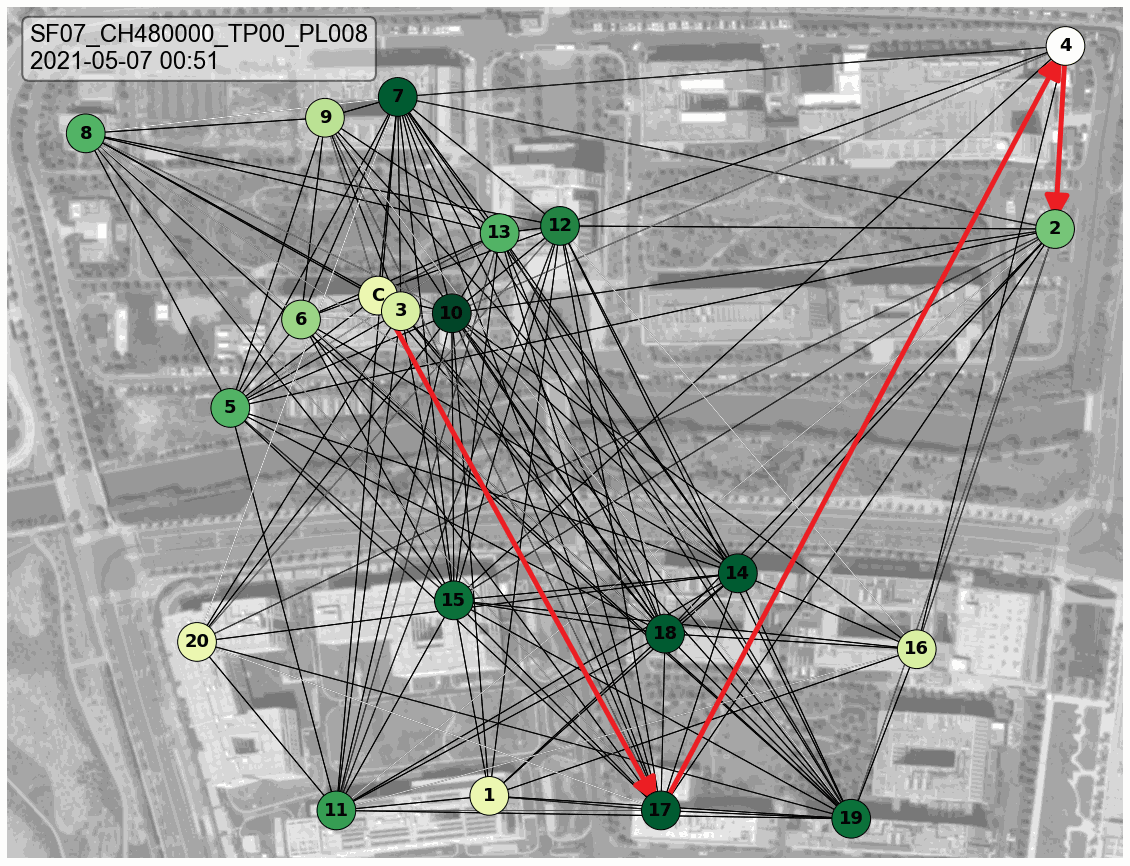

In [4]:
from IPython.display import Image # show GIF figures
# show the GIF of topology
file_prefix = 'Networktopology' + "_SF" + str('{0:02}'.format(sf_list[0])) + "_CH" + str('{0:06}'.format(freq_list[0]))
Image(open(directory_path + "\\" + PROCESSED_PLOTS_FOLDER + "\\" + file_prefix + '.gif','rb').read())

<b>Figure 2:</b>

Showing maximum and minimum temperatures for all nodes, and weather temperature from June 22, 2021 to June 25, 2021

In [5]:
plot_type = ["max_min_temperature", 'pdf'] # plot type and output format
sf_list = [12] # SF = 12 and RF = 490 MHz
freq_list = [490000]
plot_date = ["2021-06-22 00:00:00", "2021-06-25 00:00:00"] # plot start and end time
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date) # dataset visualization with configurations

<b>Figure 3:</b>

Impact of weather conditions on link quality in terms of RSS at the link-level (link #19-10) during June 25 - July 25, 2021. Radio parameters are set to SF 7 and 480 MHz.

In [6]:
plot_type = ['AVG_link_RSSI_temperature_plot', 'pdf'] # plot type and output format
sf_list = list(range(7,13)) # SF = 7-12 and RF = 480 MHz
freq_list = [480000]
rx_tx_node = [10, 19] # rx and tx nodes
plot_date = ["2021-06-25 00:00:00", "2021-07-25 00:00:00"] # plot start and end time
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date, rx_tx_node) # dataset visualization with configurations

<b>Figure 4:</b>

Impact of weather conditions on connectivity in terms of the number of neighbours at the network- and node-level (node 4). Radio parameters are set to SF 7 and 480 MHz.

In [7]:
plot_type = ["subplot_degree", 'pdf'] # plot type and output format
sf_list = [7] # SF = 7 and RF = 480 MHz
freq_list = [480000]
# rx and tx nodes
rx_tx_node = [13, 0] # rx and tx nodes
plot_date = ["2021-05-27 00:00:00", "2021-06-01 08:00:00"] # plot start and end time
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date, rx_tx_node) # dataset visualization with configurations

<b>Figure 5:</b>

Impact of weather conditions on link quality in terms of PRR at the link-level (link #7-5). Radio parameters are set to SF 7 and 480 MHz.

In [8]:
plot_type = ["subplot_PRR", 'pdf'] # plot type and output format
sf_list = [7] # SF = 7 and RF = 480 MHz
freq_list = [480000]
rx_tx_node = [5, 7] # rx and tx nodes
plot_date = ["2021-05-06 14:00:00", "2021-05-11 12:00:00"] # plot start and end time
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date, rx_tx_node) # dataset visualization with configurations

Draw heatmap and topologies and convert them to GIFs.

<b>Note:</b>

Do not draw with a long period (more than 24 hours), otherwise there will be a lot of figures and the GIF will become huge.

In [9]:
plot_type = ["heatmap"] # plot type and output format
sf_list = [7] # SF = 7 and RF = 480 MHz
freq_list = [480000]
# plot start and end time
plot_date = ["2021-05-07 00:00:00", "2021-05-07 12:00:00"] # plot start and end time
# save plot output format
dataset_tool.dataset_analysis(sf_list, freq_list, id_list, directory_path, dataset_CSV, plot_type, plot_date)

Show heatmap GIF

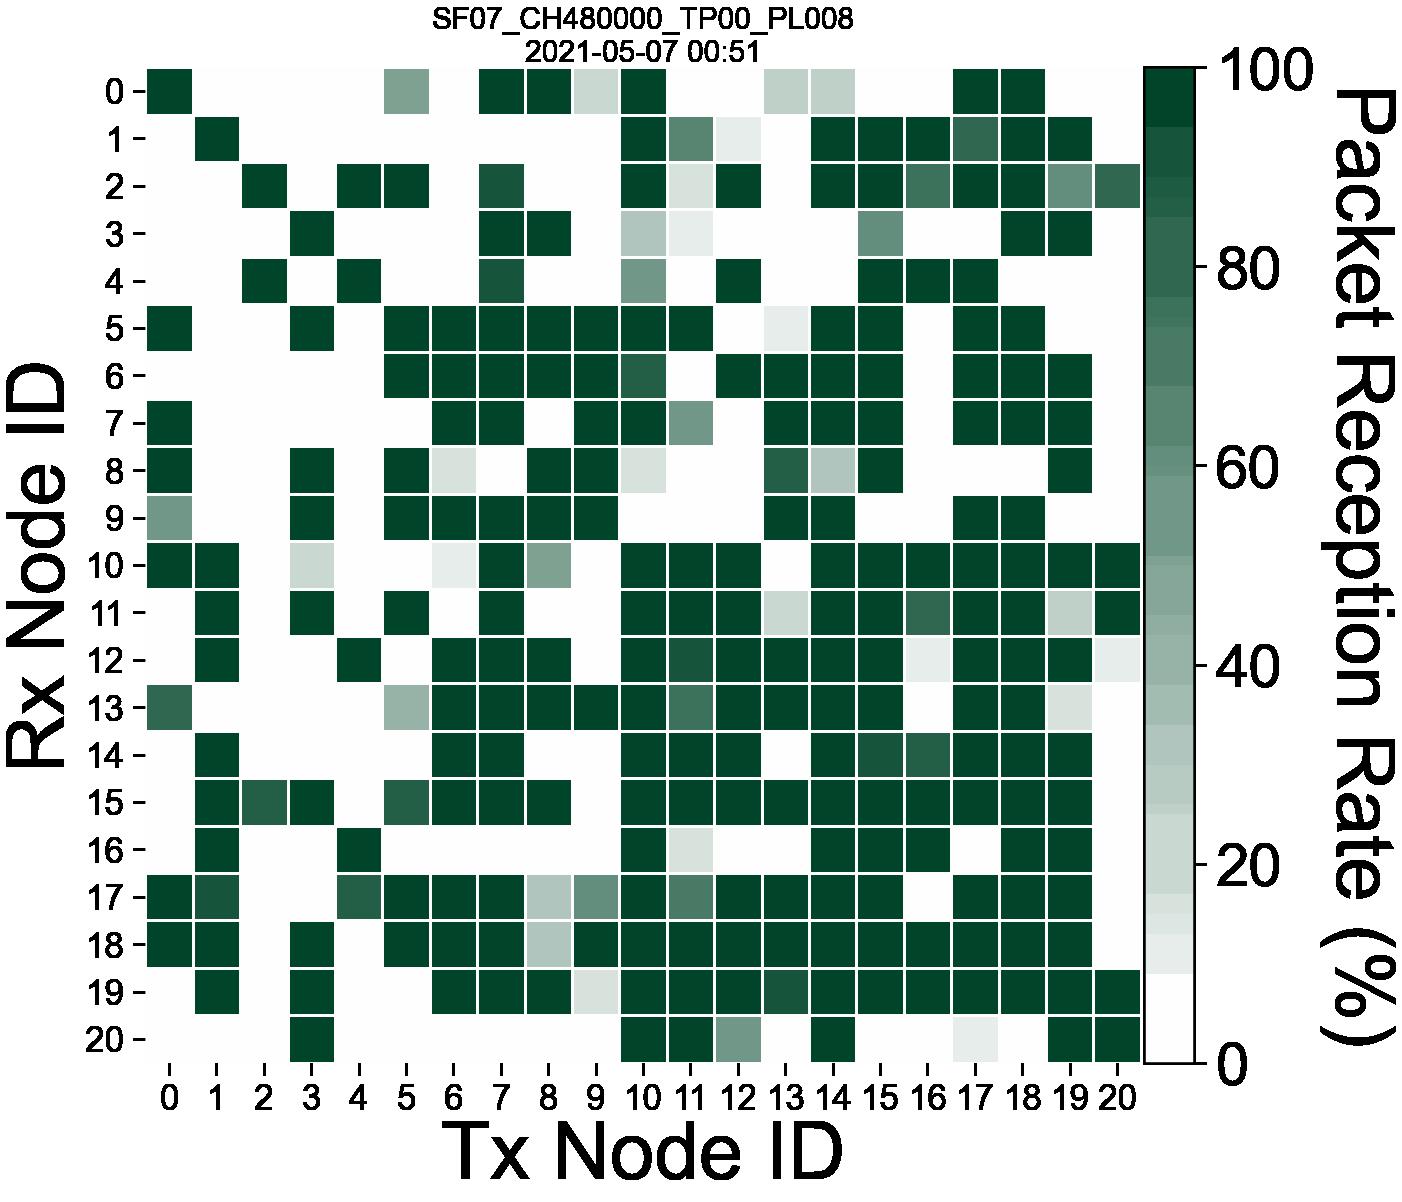

In [10]:
# show the GIF of heatmap
file_prefix = 'Heatmap' + "_SF" + str('{0:02}'.format(sf_list[0])) + "_CH" + str('{0:06}'.format(freq_list[0]))
Image(open(directory_path + "\\" + PROCESSED_PLOTS_FOLDER + "\\" + file_prefix + '.gif','rb').read())

<b>Metadata:</b>

If one want to process the dataset metadata, one can use the metadata processing tool to generate the same CSV file as ```dataset_03052021_15092021.csv```.
The CSV file named `dataset.csv` will be generated in the subdirectory `dataset_metadata/dataset/` under the specified directory.

In [11]:
from metadata_processing import *
dataset_processing_tool = TXT_metadata() # Specify metadata processing class
dataset_processing_tool.metadata_to_CSV(directory_path+"\\dataset_metadata\\", id_list) # process the metadata in "\\dataset_metadata\\" with 21 nodes